<a href="https://colab.research.google.com/github/cram05/practicas-machine-learning/blob/main/K_vecinos_m%C3%A1s_cercanos_(solucionado20211207).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-vecinos más cercanos (KNN)

In [ ]:
from google.colab import files
import io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Regresón KNN

### Intuición

Consideremos el siguiente conjunto de datos sobre métricas de árboles. Se dispone la circunferencia (C), altura (A) y volúmen (V) de distintos árboles.

In [ ]:
uploaded = files.upload()

Saving trees.csv to trees.csv


In [ ]:
trees = pd.read_csv(io.StringIO(uploaded['trees.csv'].decode('utf-8')),index_col=0)
trees

,C,A,V
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8
6,10.8,83,NaN
7,11.0,66,15.6
8,11.0,75,18.2
9,11.1,80,22.6
10,11.2,75,19.9


Notemos que no tenemos el volumen de algunos árboles.

In [ ]:
# datos sin volúmen
trees[trees.V.isna()]

,C,A,V
6,10.8,83,NaN


Sin embargo, podemos obtener estimaciones de sus volúmnes aplicando la regresión por k-vecinos más cercanos. Antes de empezar, grafiquemos los datos.

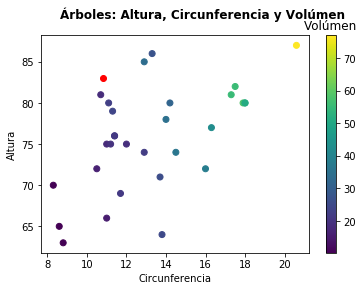

In [ ]:
# Árboles con volúmen
plt.scatter(x = trees.C,
            y = trees.A,
            c = trees.V,
            cmap='viridis')
cbar = plt.colorbar()
cbar.ax.set_title("Volúmen")

# Árboles sin volúmen
plt.scatter(x = trees[trees.V.isna()].C,
            y = trees[trees.V.isna()].A,
            color = 'red')

plt.suptitle("Árboles: Altura, Circunferencia y Volúmen", fontweight = 'bold')
plt.xlabel("Circunferencia")
plt.ylabel("Altura")
plt.show()

Nuevamente, recordemos que nos interesa obtener los volúmenes de los siguientes árboles.

In [ ]:
# datos sin volúmen
trees[trees.V.isna()]

,C,A,V
6,10.8,83,NaN


Empecemos estimando el volúmen del primer árbol, el árbol número 6. Si volvemos al gráfico, podemos ver que hay árboles que tienen circunferencia y áltura próximos. Árboles que además parecen tener volúmenes similares.

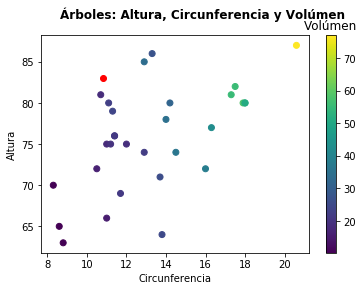

In [ ]:
# Árboles con volúmen
plt.scatter(x = trees.C,
            y = trees.A,
            c = trees.V,
            cmap='viridis')
cbar = plt.colorbar()
cbar.ax.set_title("Volúmen")

# Árboles nro 6
plt.scatter(x = trees[trees.V.isna()].C[6],
            y = trees[trees.V.isna()].A[6],
            color = 'red')

# OJO! A veces las apariencias engañan...
#plt.axis('equal')

plt.suptitle("Árboles: Altura, Circunferencia y Volúmen", fontweight = 'bold')
plt.xlabel("Circunferencia")
plt.ylabel("Altura")
plt.show()

Formalicemos la estrategia de los k-vecinos más cercanos. Necesitamos identificar un cierto número de árboles cercanos al árbol 6 respecto a su circunferencia y altura. Para esto calculemos la distancia euclidanea entre el árbol 6 y los demás.

Recordemos que la distancia euclidiana entre dos puntos $x=(x_1,x_2,...,x_p)$ y $z=(z_1,z_2,...,z_p)$ esta definida por:

$$
d(x,z) = \sqrt{\sum_{j=1}^{p}(x_j - z_j)^2}
$$

Luego, tenemos:

In [ ]:
trees['dist_a_06'] = np.sqrt((trees.A-trees.A[6])**2+(trees.C-trees.C[6])**2)
trees

,C,A,V,dist_a_06
1,8.3,70,10.3,13.238202
2,8.6,65,10.3,18.133946
3,8.8,63,10.2,20.099751
4,10.5,72,16.4,11.004090
5,10.7,81,18.8,2.002498
6,10.8,83,NaN,0.000000
7,11.0,66,15.6,17.001176
8,11.0,75,18.2,8.002500
9,11.1,80,22.6,3.014963
10,11.2,75,19.9,8.009994


Ahora ordenemos los árboles respecto a su distiancia con el árbol 6, desde el más cercano hasta el más lejano.

In [ ]:
trees.sort_values(by="dist_a_06")

,C,A,V,dist_a_06
6,10.8,83,NaN,0.000000
5,10.7,81,18.8,2.002498
17,12.9,85,33.8,2.900000
9,11.1,80,22.6,3.014963
18,13.3,86,27.4,3.905125
11,11.3,79,24.2,4.031129
22,14.2,80,31.7,4.534314
21,14.0,78,34.5,5.936329
27,17.5,82,55.7,6.774216
26,17.3,81,55.4,6.800735


Ahora consideremos únicamente los 3 árboles más cercanos al árbol 6. Esto es, consideremos un vecindario con $K=3$.

---



In [ ]:
trees.sort_values(by="dist_a_06")[1:4]

,C,A,V,dist_a_06
5,10.7,81,18.8,2.002498
17,12.9,85,33.8,2.900000
9,11.1,80,22.6,3.014963


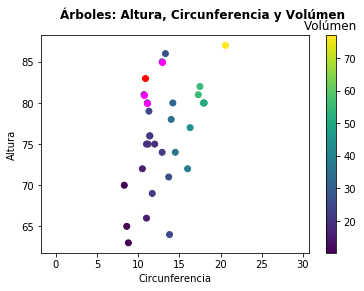

In [ ]:
# Árboles con volúmen
plt.scatter(x = trees.C,
            y = trees.A,
            c = trees.V,
            cmap='viridis')
cbar = plt.colorbar()
cbar.ax.set_title("Volúmen")

# Árboles nro 6
plt.scatter(x = trees[trees.V.isna()].C[6],
            y = trees[trees.V.isna()].A[6],
            color = 'red')

# Árboles cercanos a 6
plt.scatter(x = trees.sort_values(by="dist_a_06")[1:4].C,
            y = trees.sort_values(by="dist_a_06")[1:4].A,
            color = 'magenta')

plt.axis('equal')
plt.suptitle("Árboles: Altura, Circunferencia y Volúmen", fontweight = 'bold')
plt.xlabel("Circunferencia")
plt.ylabel("Altura")
plt.show()

Genial, ahora podemos estimar el volúmen del árbol 6 promediando los volúmenes de sus vecinos. Es decir,

$$
\hat{y}_6 = \frac{1}{3}\sum_{\{i\ |\ \mathbf{x}_i \in N_3(\mathbf{x}_6)\}} y_i
$$

Calculando, tenemos:

In [ ]:
# Promedio de volúmenes en el vecindario del árbol 6
trees.sort_values(by="dist_a_06")[1:4].V.mean()

25.066666666666663

### Formalización del algoritmo

Genial, con esta intuición podemos formalizar el algoritmo de regresión KNN.

Sea $\mathbf{x}$ un punto del cual deseamos obtener una estimación de su respuesta $\hat{y}$. Dado un valor $K$ de vecinos, obtenemos la estimación como sigue.

1. Calcular algún tipo de distancia entre $x$ y el resto de puntos de entrenamiento $\{\mathbf{x}_1,...,\mathbf{x}_n\}$
2. Seleccionar los $K$ puntos más cercanos a $\mathbf{x}$.
3. Calcular la estimación $\hat{y}$ promediando las respuestas de los $K$ vecinos más cercanos a $\mathbf{x}$.

### Uso de librerias

Ya entendemos como funciona el algoritmo, ahora usemos una libreria que nos facilite los cálculos.

In [ ]:
# Primero debemos definir el conjunto de entrenamiento...
X = trees[trees.V.notna()].loc[:,['C','A']]
y = trees[trees.V.notna()].loc[:,['V']]

In [ ]:
X.head()

,C,A
1,8.3,70
2,8.6,65
3,8.8,63
4,10.5,72
5,10.7,81


In [ ]:
y.head()

,V
1,10.3
2,10.3
3,10.2
4,16.4
5,18.8


In [ ]:
# Importar libreria
from sklearn.neighbors import KNeighborsRegressor

# Definición del modelo
knn_reg = KNeighborsRegressor(n_neighbors=3)

# Entrenamiento
knn_reg.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Predicción (Datos del árbol 6)
knn_reg.predict([[10.8,83]]).round(2)

array([[25.07]])

Al parecer hicimos un buen trabajo. Sin embargo una forma de validar esto es imaginar que todos los datos de entrenamiento tienen volúmenes desconocidos. Luego, podemos estimar volúmenes y calcular una métrica de error.

In [ ]:
# Calcular estimaciones para todos los árboles
my_trees_new = pd.DataFrame(pd.concat([X,y],axis=1))
my_trees_new["V_hat"] = knn_reg.predict(X.values).round(2)
my_trees_new.head(10)

,C,A,V,V_hat
1,8.3,70,10.3,16.00
2,8.6,65,10.3,12.03
3,8.8,63,10.2,12.03
4,10.5,72,16.4,14.97
5,10.7,81,18.8,21.87
7,11.0,66,15.6,15.73
8,11.0,75,18.2,19.07
9,11.1,80,22.6,21.87
10,11.2,75,19.9,19.07
11,11.3,79,24.2,21.87


In [ ]:
# Calculemos errores al cuadrado
my_trees_new["e2"] = (my_trees_new.V - my_trees_new.V_hat)**2
my_trees_new.head(5)

,C,A,V,V_hat,e2
1,8.3,70,10.3,16.00,32.4900
2,8.6,65,10.3,12.03,2.9929
3,8.8,63,10.2,12.03,3.3489
4,10.5,72,16.4,14.97,2.0449
5,10.7,81,18.8,21.87,9.4249


In [ ]:
# Obetengamos el error cuadrático medio
my_trees_new.e2.sum()/my_trees_new.shape[0]

16.203253333333326

### Ejercicios

* Sigue los mismo pasos y calcula la estimación del volúmen del árbol 6. Pero ahora considera distancias de Manhattan y un vecindario con $K=4$.

In [ ]:
# Completa el código

# Definición del modelo
knn_reg_2 = KNeighborsRegressor(n_neighbors=4, p=1)

# Entrenamiento
knn_reg_2.fit(X.values, y)

# Predicción (Datos del árbol 6)
knn_reg_2.predict([[10.8,83]]).round(2)

array([[24.85]])

* Manteniendo el uso de la distancia de manhattan, entrena distintos modelos de forma iterativa variando $K$ desde $2$ hasta $15$. Grafica la evolución del error cuadrático medio ($ECM$) de las predicciones del conjunto de datos de entrenamiento respecto a $K$.

<function matplotlib.pyplot.show>

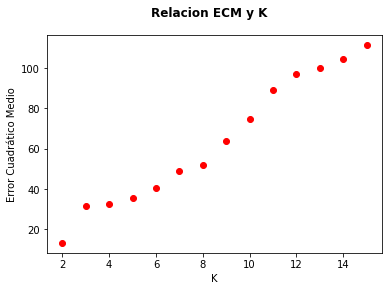

In [ ]:
ecm = []
for k in np.arange(2,16):
  # Calcular estimaciones para todos los árboles
  knn_reg_3 = KNeighborsRegressor(n_neighbors=k, p=1)

  # Entrenamiento
  knn_reg_3.fit(X.values, y.values)

  #my_trees_new = pd.DataFrame(pd.concat([X,y],axis=1))
  #my_trees_new["V_hat"] = knn_reg_3.predict(X.values).round(2)
  #my_trees_new["e2"] = (my_trees_new.V - my_trees_new.V_hat)**2
  #ecm.append(my_trees_new.e2.sum()/my_trees_new.shape[0])

  predicciones = knn_reg_3.predict(X.values)
  errores =(predicciones - y)**2 #errores cuadraticos
  ecm.append(errores.values.sum()/X.shape[0])

#grafico
plt.scatter(x = np.arange(2,16),
            y = ecm,
           color = 'red',)
plt.suptitle("Relacion ECM y K", fontweight = 'bold')
plt.xlabel("K")
plt.ylabel("Error Cuadrático Medio")
plt.show

## Clasificación KNN

### Intuición

Ahora vamos a resolver un problema de clasificación aplicando KNN. Para ello, consideraremos un conjunto de datos sobre tiroides.

In [ ]:
uploaded = files.upload()

Saving newthyroid.csv to newthyroid.csv


El conjunto de datos contiene información de varios sujetos cuyas tiroides pueden ser de tres tipos que esperan identificar a partir de 5 variables numéricas.

In [ ]:
thyroids = pd.read_csv(io.StringIO(uploaded['newthyroid.csv'].decode('utf-8')))
thyroids.head()

,T3resin,Thyroxin,Triiodothyronine,Thyroidstimulating,TSH_value,Class
0,107,10.1,2.2,0.9,2.7,1
1,113,9.9,3.1,2.0,5.9,1
2,127,12.9,2.4,1.4,0.6,1
3,109,5.3,1.6,1.4,1.5,1
4,105,7.3,1.5,1.5,-0.1,1


In [ ]:
thyroids.columns = ['T3','TRX','TRI','TRS','TSH','Tipo']
thyroids.head()

,T3,TRX,TRI,TRS,TSH,Tipo
0,107,10.1,2.2,0.9,2.7,1
1,113,9.9,3.1,2.0,5.9,1
2,127,12.9,2.4,1.4,0.6,1
3,109,5.3,1.6,1.4,1.5,1
4,105,7.3,1.5,1.5,-0.1,1


Para fines didácticos, consideraremos únicamente las dos primeras variables para identificar los tipos de tiroides.

In [ ]:
thyroids_selected = thyroids.loc[:,['T3','TRX','Tipo']]
thyroids_selected.head()

,T3,TRX,Tipo
0,107,10.1,1
1,113,9.9,1
2,127,12.9,1
3,109,5.3,1
4,105,7.3,1


Grafiquemos la información selecionada de los sujetos de entrenamiento.

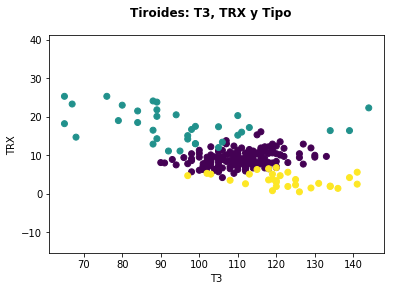

In [ ]:
# Sujetos de entrenamiento
plt.scatter(x = thyroids_selected.T3,
            y = thyroids_selected.TRX,
            c = thyroids_selected.Tipo,
            cmap='viridis')

plt.axis('equal')
plt.suptitle("Tiroides: T3, TRX y Tipo", fontweight = 'bold')
plt.xlabel("T3")
plt.ylabel("TRX")
plt.show()

Ahora consideremos un nuevo sujeto del cual desconocemos su tipo de tiroide.

In [ ]:
# Nuevo sujeto
new_subject = [136,12,np.nan]
new_subject

[136, 12, nan]

  Grafiquemos al nuevo sujeto entre el resto de observaciones.

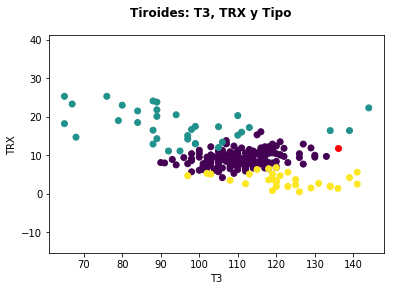

In [ ]:
# Sujetos de entrenamiento
plt.scatter(x = thyroids_selected.T3,
            y = thyroids_selected.TRX,
            c = thyroids_selected.Tipo,
            cmap='viridis')

# Nuevo sujeto
plt.scatter(x = new_subject[0],
            y = new_subject[1],
            color = 'red')

plt.axis('equal')
plt.suptitle("Tiroides: T3, TRX y Tipo", fontweight = 'bold')
plt.xlabel("T3")
plt.ylabel("TRX")
plt.show()

Ahora, tal como antes, calculemos distancias euclidaneas entre el nuevo sujeto y las observaciones de entrenamiento.

In [ ]:
# Calcular distancias euclidianas
thyroids_selected['dist_a_new_subject'] = np.sqrt(
    (thyroids_selected.T3  - new_subject[0])**2 +
    (thyroids_selected.TRX - new_subject[1])**2)

thyroids_selected.head()

,T3,TRX,Tipo,dist_a_new_subject
0,107,10.1,1,29.062175
1,113,9.9,1,23.095671
2,127,12.9,1,9.044888
3,109,5.3,1,27.818878
4,105,7.3,1,31.354266


Tomando un vecindario de $K=10$ tenemos los siguientes vecinos:

In [ ]:
# Vecindario con K=10
thyroids_selected.sort_values(by="dist_a_new_subject")[:10]

,T3,TRX,Tipo,dist_a_new_subject
72,133,9.7,1,3.780212
156,134,16.4,2,4.833218
150,139,16.4,2,5.325411
128,130,10.0,1,6.324555
38,130,9.5,1,6.500000
42,129,11.9,1,7.000714
190,141,5.6,3,8.121576
211,139,4.2,3,8.357033
2,127,12.9,1,9.044888
137,127,7.7,1,9.974467


Graficando,

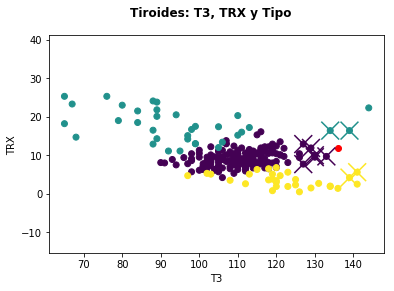

In [ ]:
# Datos de entrenamiento
plt.scatter(x = thyroids_selected.T3,
            y = thyroids_selected.TRX,
            c = thyroids_selected.Tipo,
            cmap='viridis')

# Nuevo sujeto
plt.scatter(x = new_subject[0],
            y = new_subject[1],
            color = 'red')

# Vecindario
plt.scatter(x = thyroids_selected.sort_values(by="dist_a_new_subject")[:10].T3,
            y = thyroids_selected.sort_values(by="dist_a_new_subject")[:10].TRX,
            c = thyroids_selected.sort_values(by="dist_a_new_subject")[:10].Tipo,
            cmap='viridis',
            marker="x",s=20*2**4)

plt.axis('equal')
plt.suptitle("Tiroides: T3, TRX y Tipo", fontweight = 'bold')
plt.xlabel("T3")
plt.ylabel("TRX")
plt.show()

Hora de calcular probabilidades. Primero identifiquemos a los vecinos que tienen tiroides de algún de tipo dado.

In [ ]:
thyroids_selected.sort_values(by="dist_a_new_subject")[:10].Tipo == 1

72      True
156    False
150    False
128     True
38      True
42      True
190    False
211    False
2       True
137     True
Name: Tipo, dtype: bool

Genial, con este tipo de vector será sencillo obtener las probabilidades tal como se puede ver a continuación.

In [ ]:
# Probabilidades
p_new_subject_is_1 = (1/10)*np.sum(
    thyroids_selected.sort_values(by="dist_a_new_subject")[:10].Tipo == 1)
p_new_subject_is_2 = (1/10)*np.sum(
    thyroids_selected.sort_values(by="dist_a_new_subject")[:10].Tipo == 2)
p_new_subject_is_3 = (1/10)*np.sum(
    thyroids_selected.sort_values(by="dist_a_new_subject")[:10].Tipo == 3)

p_new_subject_is ={'1':p_new_subject_is_1,
                   '2':p_new_subject_is_2,
                   '3':p_new_subject_is_3}

In [ ]:
# P(tipo=1|...)
p_new_subject_is_1

0.6000000000000001

In [ ]:
# P(tipo=2|...)
p_new_subject_is_2

0.2

In [ ]:
# P(tipo=3|...)
p_new_subject_is_3

0.2

In [ ]:
# Prediccón (argmax)
max(p_new_subject_is, key=p_new_subject_is.get)

'1'

### Formalización del algoritmo

Genial, con esta intuición, de igual forma, podemos formalizar el algoritmo de clasificación KNN.

Sea $\mathbf{x}$ un punto del cual deseamos obtener una estimación de su respuesta $\hat{y}$ enre un total de $T$ clases posibles. Dado un valor $K$ de vecinos, obtenemos la estimación como sigue.

1. Calcular algún tipo de distancia entre $\mathbf{x}$ y el resto de puntos de entrenamiento $\{\mathbf{x}_1,...,\mathbf{x}_n\}$
2. Seleccionar los $K$ puntos más cercanos a $\mathbf{x}$.
3. Tomando este conjunto, calcular cada una de las probabilidades de que la respuesta sea alguna de las $T$ clases posibles usando la expresión $P(y=c_j|x,\mathcal{D},K) =
\frac{1}{K} \sum_{\mathbf{x}_i \in N_K(\mathbf{x})} I(y_i=c_j), \quad j=1,...,T$.
3. Calcular la estimación $\hat{y}$ buscando la clase que tenga la mayor probabilidad de ser la respuesta que desconocemos. Esto es $\hat{y} = \underset{c \in \{c_1,c_2,...,c_T\}}{\operatorname{argmax}} P(y=c_j|x,k)$

__Nota:__ En caso de empate de probabilidades, le elección de la estimación deberá ser de forma aleatoria entre las clases empatadas.

### Uso de librerías

Hora de suar una libreria que nos facilite los cálculos.

In [ ]:
# Primero debemos definir el conjunto de entrenamiento...
X = thyroids_selected.loc[:,['T3','TRX']]
y = thyroids_selected.loc[:,['Tipo']]

In [ ]:
X.head()

,T3,TRX
0,107,10.1
1,113,9.9
2,127,12.9
3,109,5.3
4,105,7.3


In [ ]:
y.head()

,Tipo
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Importar librería
from sklearn.neighbors import KNeighborsClassifier

# Definir modelo
knn_class = KNeighborsClassifier(n_neighbors=10)

# Entrenamiento
knn_class.fit(X.values, np.ravel(y))

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Probabilidades (Datos del nuevo sujeto)
knn_class.predict_proba([[new_subject[0], new_subject[1]]])

array([[0.6, 0.2, 0.2]])

In [ ]:
# Predicción (Datos del nuevo sujeto)
knn_class.predict([[new_subject[0], new_subject[1]]])

array([1])

In [ ]:
# Predicciones para todos los sujetos
knn_class.predict(X.values)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1])

In [ ]:
# Matriz de confusión
mc = pd.crosstab(knn_class.predict(X),np.ravel(y))
mc

col_0,1,2,3
row_0,,,
1,150,13,9
2,0,22,0
3,0,0,21


In [ ]:
# Tasa de clasificación erronea
(1-np.diag(mc).sum()/len(y))*100

10.232558139534886

## Ejercicios

* Sigue los mismos pasos y calcula la clase estimada del nuevo sujeto. Considera distancias de Minkowski con $p=5$ y un vecindario con $K=20$.

In [ ]:
# Completa el código
# Definir modelo
knn_class_2 = KNeighborsClassifier(n_neighbors=20, p=5)

# Entrenamiento
knn_class_2.fit(X.values, np.ravel(y))

# Nuevo sujeto
new_subject = [136,12,np.nan]

# Probabilidades (Datos del nuevo sujeto)
prob = knn_class_2.predict_proba([[new_subject[0], new_subject[1]]])

# Predicción (Datos del nuevo sujeto)
pred = knn_class_2.predict([[new_subject[0], new_subject[1]]])

prob, pred

(array([[0.4 , 0.15, 0.45]]), array([3]))

* Manteniendo el uso de la distancia de Minkowski con $p=5$, entrena distintos modelos de forma iterativa variando $K$ desde $2$ hasta $50$. Grafica la evolución de la tasa de clasificación erronea ($TCE$) de las predicciones del conjunto de datos de entrenamiento respecto a $K$.


<function matplotlib.pyplot.show>

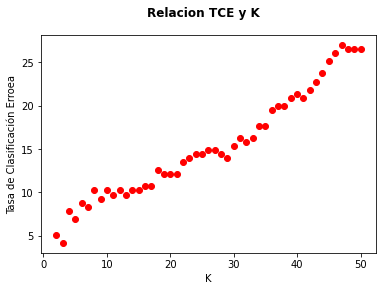

In [ ]:
tce = []
for k in np.arange(2,51):
  knn_class_k = KNeighborsClassifier(n_neighbors=k, p=5)

  # Entrenamiento
  knn_class_k.fit(X.values, np.ravel(y))

  predicciones = knn_class_k.predict(X.values)
  mc = pd.crosstab(predicciones, np.ravel(y))
  tce.append((1-np.diag(mc).sum()/len(y))*100)

#grafico
plt.scatter(x = np.arange(2,51),
            y = tce,
           color = 'red',)
plt.suptitle("Relacion TCE y K", fontweight = 'bold')
plt.xlabel("K")
plt.ylabel("Tasa de Clasificación Erroea")
plt.show